# Example of the `aitlas` toolbox in the context of multi label image classification

This notebook shows a sample implementation of a multi label image classification using the `aitlas` toolbox using the UC merced multi label dataset.

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
import seaborn as sns
import numpy as np

from aitlas.datasets import UcMercedMultiLabelDataset
from aitlas.models import ResNet50MultiLabel
from aitlas.tasks.predict import TestFolderDataset
from aitlas.visualizations import display_image_labels
from aitlas.transforms import BaseClassificationTransforms
from aitlas.utils import image_loader

print(UcMercedMultiLabelDataset.classes_to_idx)

{'airplane': 0, 'bare-soil': 1, 'buildings': 2, 'cars': 3, 'chaparral': 4, 'court': 5, 'dock': 6, 'field': 7, 'grass': 8, 'mobile-home': 9, 'pavement': 10, 'sand': 11, 'sea': 12, 'ship': 13, 'tanks': 14, 'trees': 15, 'water': 16}


## Visualize images

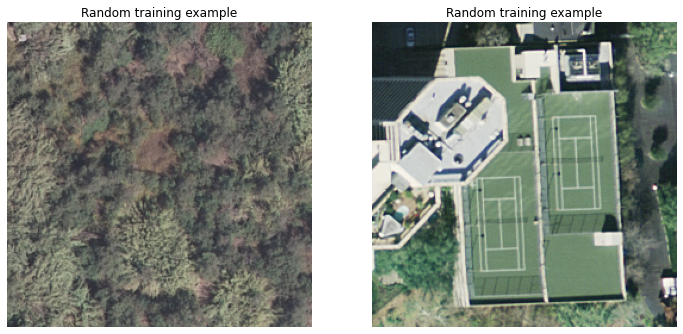

In [7]:
example_image1 = Image.open('/media/hdd/UCMerced_multilabels/train/images/forest33.tif')
example_image2 = Image.open('/media/hdd/UCMerced_multilabels/train/images/tenniscourt28.tif')
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)
plt.subplot(1,2,1)
plt.imshow(example_image1)
plt.title(f"Random training example")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(example_image2, cmap='gray')
plt.title(f"Random training example")
plt.axis('off')
plt.show()

## Inspect data

In [8]:
df = pd.read_csv("/media/hdd/UCMerced_multilabels/multilabels.txt", sep="\t")
df.head(20)

,IMAGE\LABEL,airplane,bare-soil,buildings,cars,chaparral,court,dock,field,grass,mobile-home,pavement,sand,sea,ship,tanks,trees,water
0,agricultural00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,agricultural01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,agricultural02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,agricultural03,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,agricultural04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,agricultural05,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,agricultural06,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,agricultural07,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,agricultural08,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,agricultural09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [9]:
df.shape

(2100, 18)

In [10]:
class_count = pd.DataFrame(df.sum(axis=0)).reset_index()
class_count.columns = ["class", "Count"]
class_count.drop(class_count.index[0], inplace=True)
class_count

,class,Count
1,airplane,100
2,bare-soil,718
3,buildings,691
4,cars,886
5,chaparral,115
6,court,105
7,dock,100
8,field,103
9,grass,975
10,mobile-home,102


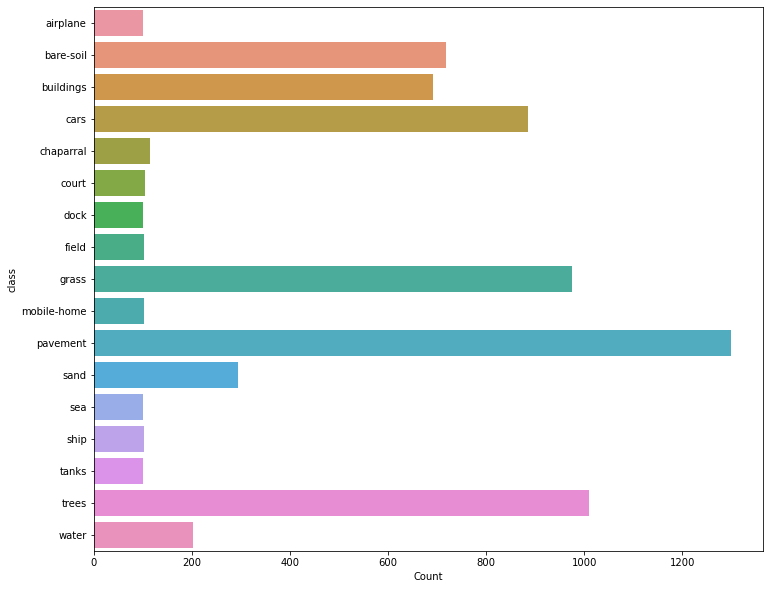

In [11]:
fig, ax= plt.subplots(figsize=(12,10))
sns.barplot(y="class", x="Count",  data=class_count, ax=ax);

## Load data

In [12]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "root": "/media/hdd/UCMerced_multilabels/train"
}

train_dataset = UcMercedMultiLabelDataset(train_dataset_config)
train_dataset.transforms = BaseClassificationTransforms 

test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "root": "/media/hdd/UCMerced_multilabels/test",
    "transforms": ["aitlas.transforms.BaseClassificationTransforms"]
}

test_dataset = UcMercedMultiLabelDataset(test_dataset_config)
len(train_dataset), len(test_dataset)

(1600, 500)

## Training and evaluation

In [ ]:
epochs = 100
model_directory = "/media/ssd/uc_merced_multilabel/experiments/"
model_config = {"num_classes": 17, "learning_rate": 0.0001,"pretrained": True, "threshold": 0.5}

model = ResNet50MultiLabel(model_config)
model.prepare()
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=test_dataset,
    run_id='1',
)

## Predictions

2021-03-10 01:02:22,045 INFO Loading checkpoint /media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar
2021-03-10 01:02:23,507 INFO Loaded checkpoint /media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar at epoch 51
running prediction: 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


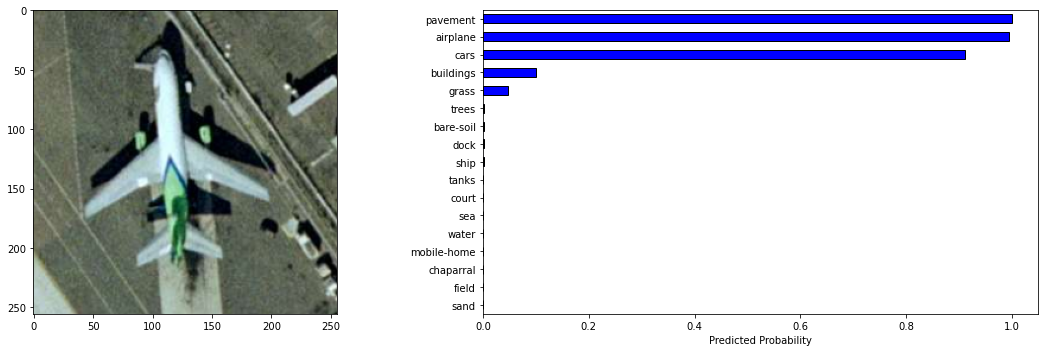

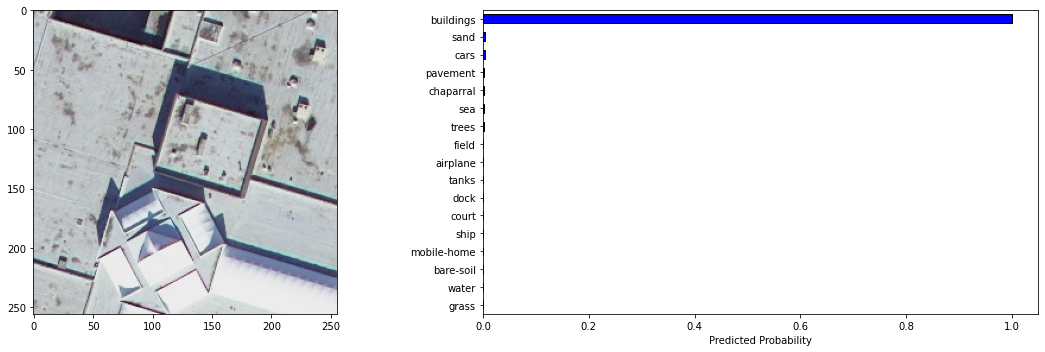

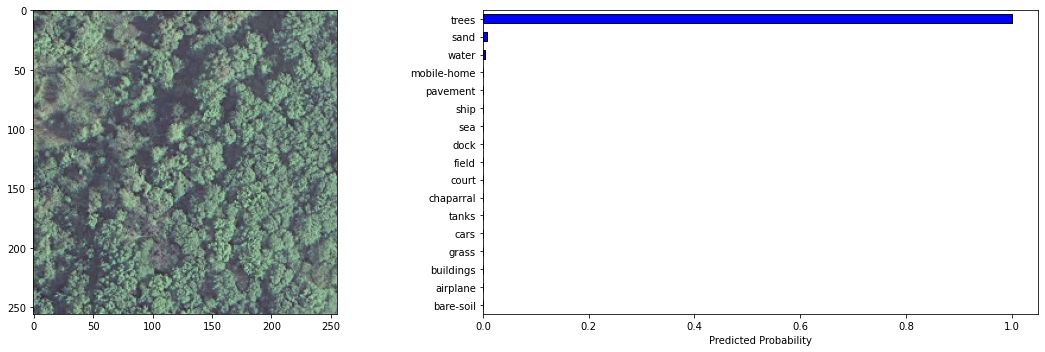

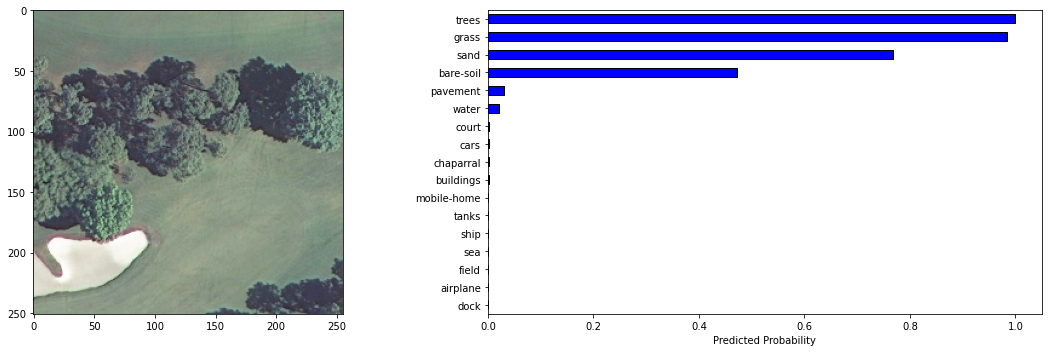

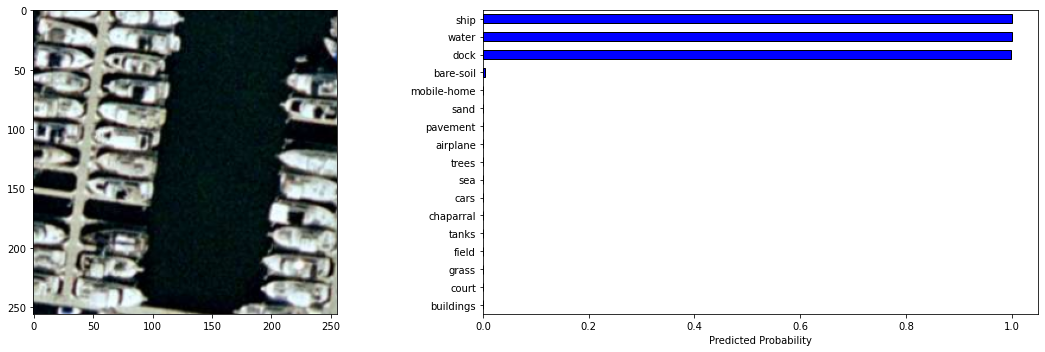

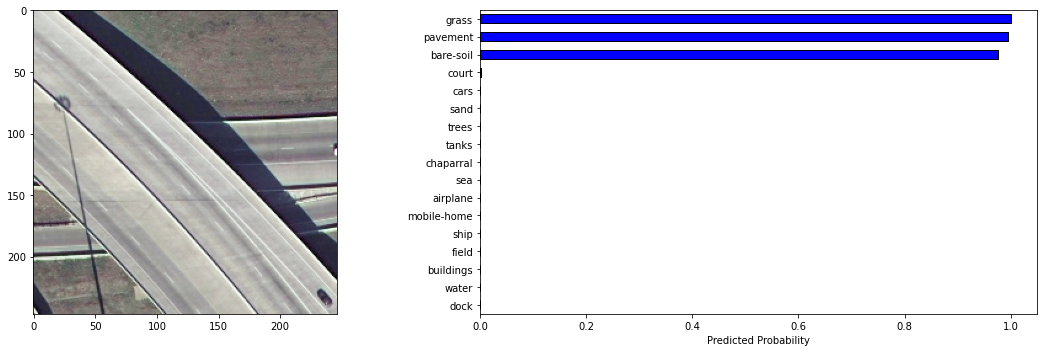

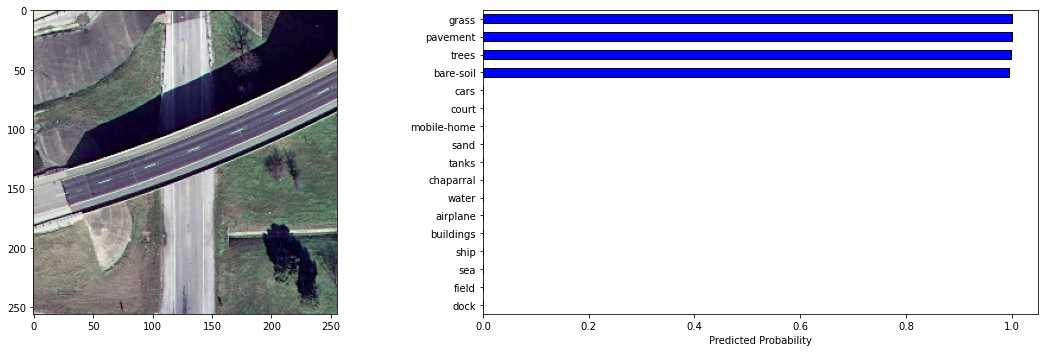

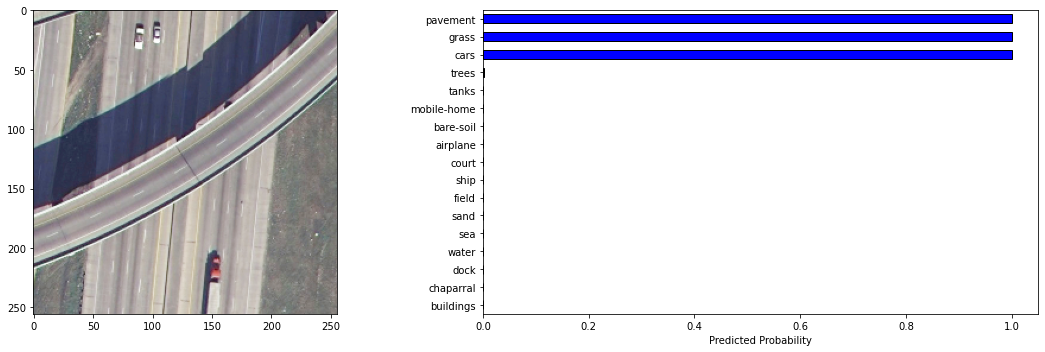

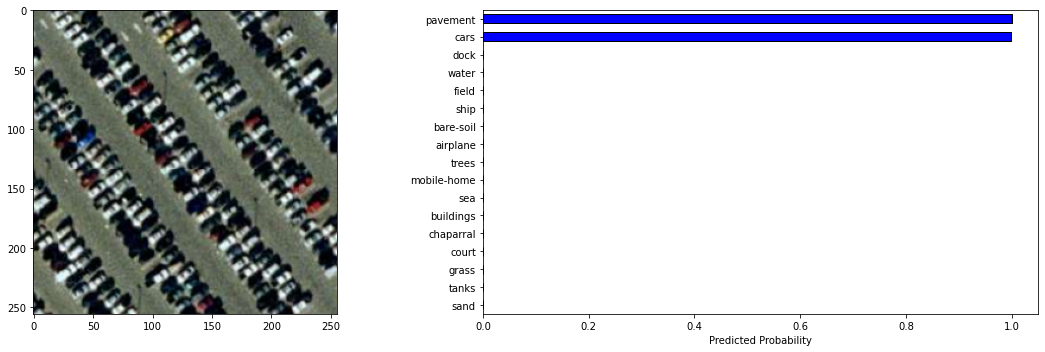

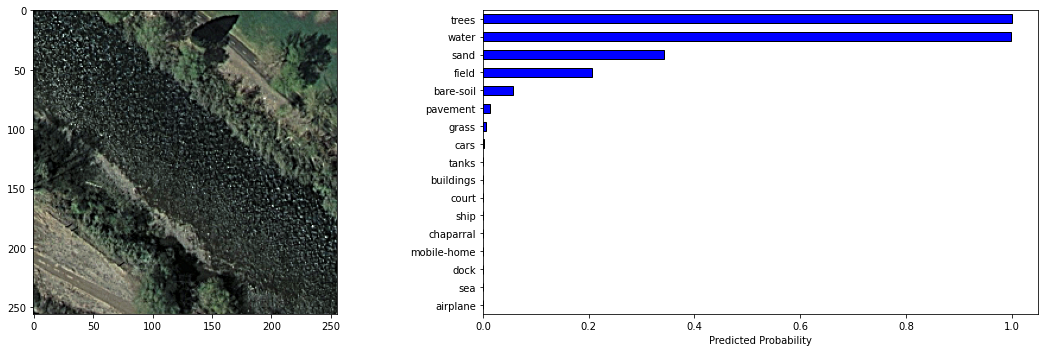

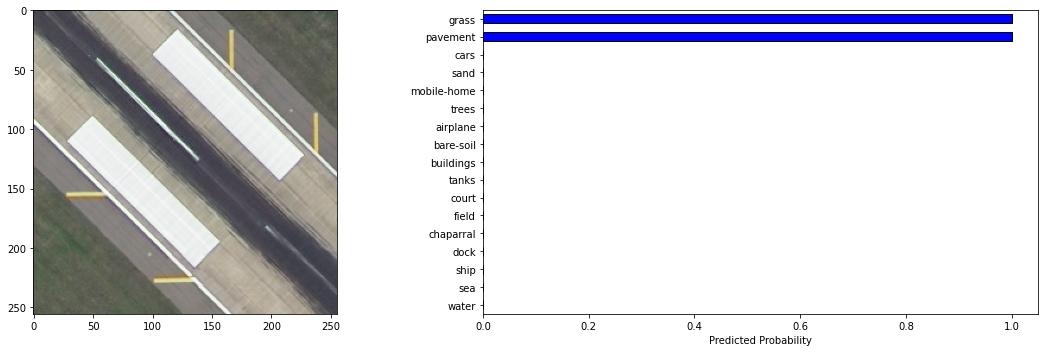

In [3]:
# run predictions
model_config = {"num_classes": 17, "learning_rate": 0.0001,"pretrained": True, "threshold": 0.5}
model = ResNet50MultiLabel(model_config)

model_path = "/media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar"
predict_dir = "/media/ssd/uc_merced_multilabel/predict/"
results_dir = "/media/ssd/uc_merced_multilabel/experiments/results"
labels = ["airplane", "bare-soil", "buildings", "cars", "chaparral", "court", "dock", "field", "grass", 
          "mobile-home", "pavement", "sand", "sea", "ship", "tanks", "trees", "water"]
transforms = ["aitlas.transforms.BaseClassificationTransforms1"]
model.load_model(model_path)
predict_dataset = TestFolderDataset(predict_dir, labels, transforms, False,)
y_true, y_pred, y_prob = model.predict(dataset=predict_dataset,)
print(y_true)
# plot predictions
for i, image_path in enumerate(predict_dataset.data):
    plot_path = os.path.join(results_dir, f"{predict_dataset.fnames[i]}_plot.png")
    display_image_labels(
        image_path,
        y_true[i],
        y_pred[i],
        y_prob[i],
        predict_dataset.labels,
        plot_path,
    )

2021-03-10 01:03:45,161 INFO Loading checkpoint /media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar
2021-03-10 01:03:46,926 INFO Loaded checkpoint /media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar at epoch 51


array(['buildings'], dtype='<U11')

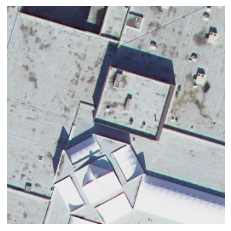

In [4]:
model_config = {"num_classes": 17, "learning_rate": 0.0001,"pretrained": True, "threshold": 0.5}
model = ResNet50MultiLabel(model_config)
model_path = "/media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar"
model.load_model(model_path)
image = image_loader('/media/ssd/uc_merced_multilabel/predict/buildings98.tif')
plt.imshow(image)
plt.axis('off')
transform = BaseClassificationTransforms1()
y_true, y_pred, y_prob = model.predict_image(image, transform)
labels = ["airplane", "bare-soil", "buildings", "cars", "chaparral", "court", "dock", "field", "grass", 
          "mobile-home", "pavement", "sand", "sea", "ship", "tanks", "trees", "water"]

np.array(labels)[tuple(y_pred)]